### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, accuracy_score as acc


import warnings
warnings.filterwarnings('ignore')

In [2]:
import multiprocessing

multiprocessing.cpu_count()

8

In [3]:
start = 1
end = 36

### Option 1: Automatic Data Preprocessing

The function Preprocessing_of_data fetches the raw data from GitHub, processes it, and returns the processed datasets.
Note: This may take some time. Alternatively, consider Option 2 for a more hands-on approach.

In [ ]:
# Import necessary libraries and extensions
%load_ext autoreload
%autoreload 2
from Process_data_def import *

### Option 2: Manual Data Preprocessing

To manually view and run the preprocessing code:
1. Ensure the .py file and this Jupyter notebook are in the same directory.
2. Uncomment the line below.

In [ ]:
# %load ./Process_data.py

### Set Directory

In [5]:
directory = r'/Users/henryemagbon/Downloads/DF'
directory = directory.replace("\\", "/")

### Optional: Save processed data to CSV

Adjust the directory path as needed. **Only run this code if you run any of the above data processing code**

In [4]:
def save_data_to_csv(start=start, end=end, directory=directory):
    for i in range(start, end):
        suffix = f'S{i:02}'
        path = directory + f'df_Stress_{suffix}.csv'
        
        # Saving to CSV
        current_df = globals()[f'df{i}']
        current_df.to_csv(path, index=False)

In [ ]:
save_data_to_csv()

### Read processed data to Variables

Run this to run load the data even if you have not ran the processing code

In [6]:
# Import CSV files back for further use
def load_data_from_csv(start=1, end=36, directory=directory):
    for i in range(start, end):
        suffix = f'S{i:02}'
        path = directory + f'/df_Stress_{suffix}.csv'
        
        # Loading from CSV
        globals()[f'df{i}'] = pd.read_csv(path)

In [7]:
load_data_from_csv(start=1, end=36, directory=directory)

In [8]:
df12.head(5)

,x,y,z,Person,bvp,eda,temp,Label
0,-29.875,-6.500,57.125,S12,15.373750,2.908267,34.07,Stress
1,-30.000,-6.500,57.250,S12,-4.745000,2.894168,34.07,Stress
2,-29.875,-6.750,57.250,S12,-17.812500,2.878788,34.05,Stress
3,-29.625,-6.875,57.250,S12,11.801875,2.865970,34.05,Stress
4,-30.000,-6.750,57.500,S12,8.325625,2.867252,34.05,Stress


In [9]:
import random

def generate_random_numbers(n=25, seed=123):
    random.seed(seed)
    available_numbers = list(range(1, 36))  # 1 to 35

    # To ensure n doesn't exceed the length of available numbers
    n = min(n, len(available_numbers))

    result = random.sample(available_numbers, n)
    
    return result

# Example usage:
#print(generate_random_numbers(25))




def df_train_number(length=20):
    numbers = generate_random_numbers(length)
    
    for i, num in enumerate(numbers, 1):
        var_name = f'df{i}'
        if var_name not in globals():  # Check if the variable already exists
            globals()[var_name] = [num]
    
    return numbers

In [10]:
def custom_round(value):
    fractional_part = value - int(value)
    if fractional_part >= 0.5:
        return int(value) + 1
    else:
        return int(value)

How many percent do you want to train?

In [11]:
train_percentage = 83
train_num = custom_round(train_percentage / 100 * (end - 1))

In [12]:
train_list = df_train_number(train_num)

In [13]:
def concatenate_dataframes_from_numbers(rand_numbers=train_num):
    dataframes = [globals()[f'df{num}'] for num in rand_numbers]
    return pd.concat(dataframes, axis=0)



df_train = concatenate_dataframes_from_numbers(train_list)

In [103]:
#df_train

In [14]:
def df_test_number(num=train_num):
    all_numbers = set(range(start, end-1))
    test_numbers = sorted(all_numbers - set(train_list))
    
    # Create DataFrames for the test numbers
    for num in test_numbers:
        var_name = f'df{num}'
        if var_name not in globals():  # Check if the variable already exists
            globals()[var_name] = pd.DataFrame([num], columns=['Value'])
    
    return test_numbers


In [15]:
test_list = df_test_number(train_num)

In [16]:
test_list

[16, 17, 19, 20, 30, 31]

In [17]:
df=df_train.copy()

In [18]:
for num in test_list:
    # Construct the variable names for X and Y based on the number from test_list
    x_var_name = f"x_df{num}_test"
    y_var_name = f"y_df{num}_test"
    
    # Access the relevant dataframe using the globals function
    source_df = globals()[f"df{num}"]
    
    # Assign the processed data to the newly created variable names
    globals()[x_var_name] = source_df.drop(['Person', 'Label'], axis=1)
    globals()[y_var_name] = source_df['Label']
    
    print("--------------------------------------------------------------------------------")
    print(f"x_df{num}_test, y_df{num}_test = df{num}.drop(['Person','Label'], axis=1), df{num}['Label']")


--------------------------------------------------------------------------------
x_df16_test, y_df16_test = df16.drop(['Person','Label'], axis=1), df16['Label']
--------------------------------------------------------------------------------
x_df17_test, y_df17_test = df17.drop(['Person','Label'], axis=1), df17['Label']
--------------------------------------------------------------------------------
x_df19_test, y_df19_test = df19.drop(['Person','Label'], axis=1), df19['Label']
--------------------------------------------------------------------------------
x_df20_test, y_df20_test = df20.drop(['Person','Label'], axis=1), df20['Label']
--------------------------------------------------------------------------------
x_df30_test, y_df30_test = df30.drop(['Person','Label'], axis=1), df30['Label']
--------------------------------------------------------------------------------
x_df31_test, y_df31_test = df31.drop(['Person','Label'], axis=1), df31['Label']


In [19]:
for num in test_list:
    print(f'length of S{num} dataframe =', len(globals()[f"df{num}"]))

length of S16 dataframe = 10282
length of S17 dataframe = 10314
length of S19 dataframe = 10080
length of S20 dataframe = 10080
length of S30 dataframe = 10320
length of S31 dataframe = 10058


In [20]:
# Prepare data
x_train, y_train = df.drop(['Person','Label'], axis=1), df['Label']

In [21]:
def plot_confusion_matrix(y_true, y_pred, ax, title="Confusion Matrix"):
    """Plot the confusion matrix using seaborn and matplotlib."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

In [22]:
import time
from IPython.display import display, clear_output

def show_loading_animation(duration=10):
    end_time = time.time() + duration
    while time.time() < end_time:
        for char in ['-', '\\', '|', '/']:
            clear_output(wait=True)
            display(char)
            time.sleep(0.1)

# Test the animation
#show_loading_animation()

In [23]:
def model_analysis(model, x_train, y_train, test_list):
    """Evaluate and visualize model performance."""

    model.fit(x_train, y_train)
    cv_tr_score = cross_val_score(model, x_train, y_train, cv=5, scoring=make_scorer(acc))
    print('Cross-validation score on training data', round(cv_tr_score.mean(), 2))

    CV_scores = []
    FN_values = []
    accuracies = []  # Initialize accuracies list

    # Calculate the number of rows required for the given test_list
    rows = (len(test_list) + 2) // 3

    # Set up figure for confusion matrices
    fig_cm, axes_cm = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))

    # Set up figure for classification reports
    fig_report, axes_report = plt.subplots(nrows=rows, ncols=3, figsize=(15, 2 * rows))  # Reduced figure height for lesser spacing

    for index, test_num in enumerate(test_list):
        row = index // 3
        col = index % 3

        x_test = globals()[f'x_df{test_num}_test']
        y_test = globals()[f'y_df{test_num}_test']

        preds = model.predict(x_test)

        # Display accuracy
        accuracy = round(acc(y_test, preds), 2)
        accuracies.append(accuracy)  # Append the accuracy to the accuracies list

        print(f"\nAccuracy of the model on participant S{test_num} data:", accuracy)

        # Cross validate on the test data
        n_ts_cv = cross_val_score(model, x_test, y_test, cv=5, scoring=make_scorer(acc))
        print(f'Cross-validation score on Participant S{test_num} data:', round(n_ts_cv.mean(), 2))
        CV_scores.append(round(n_ts_cv.mean(), 2))

        # Plot confusion matrix
        plot_confusion_matrix(y_test, preds, axes_cm[row, col], title=f'S{test_num} Confusion Matrix')

        # Display classification report
        report = classification_report(y_test, preds)
        axes_report[row, col].axis('off')  # Turn off the axis
        axes_report[row, col].text(0.1, 0.9, f"S{test_num} Classification Report", fontsize=12, weight='bold')  # Repositioned title
        axes_report[row, col].text(0, 0.6, report, fontsize=10, va='top')

        # Append the FN value
        FN_values.append(confusion_matrix(y_test, preds)[1][0])

    # Remove unused subplots
    for i in range(index + 1, 3):
        axes_cm[row, i].axis('off')
        axes_report[row, i].axis('off')

    fig_cm.tight_layout()
    fig_report.tight_layout(pad=0.4, h_pad=0.5, w_pad=0.5)  # Adjusted padding for lesser spacing

    fig_cm.suptitle('Confusion Matrices', y=1.02)
    fig_report.suptitle('Classification Reports', y=1.05)

    plt.show()

    for i, test_num in enumerate(test_list):
        print(f"\nCV of S{test_num} =", CV_scores[i])
        x_test_global = globals()[f'df{test_num}']
        print(f"S{test_num} Accuracy =", round(acc(x_test_global['Label'], model.predict(x_test_global.drop(['Person', 'Label'], axis=1))), 2))
        print(f"The FN of S{test_num} =", FN_values[i])

    return accuracies, CV_scores, FN_values


'/'


Logistic Regression Analysis
--------------------
Cross-validation score on training data 0.58

Accuracy of the model on participant S16 data: 0.6
Cross-validation score on Participant S16 data: 0.69

Accuracy of the model on participant S17 data: 0.58
Cross-validation score on Participant S17 data: 0.71

Accuracy of the model on participant S19 data: 0.6
Cross-validation score on Participant S19 data: 0.77

Accuracy of the model on participant S20 data: 0.59
Cross-validation score on Participant S20 data: 0.71

Accuracy of the model on participant S30 data: 0.58
Cross-validation score on Participant S30 data: 0.65

Accuracy of the model on participant S31 data: 0.59
Cross-validation score on Participant S31 data: 0.77


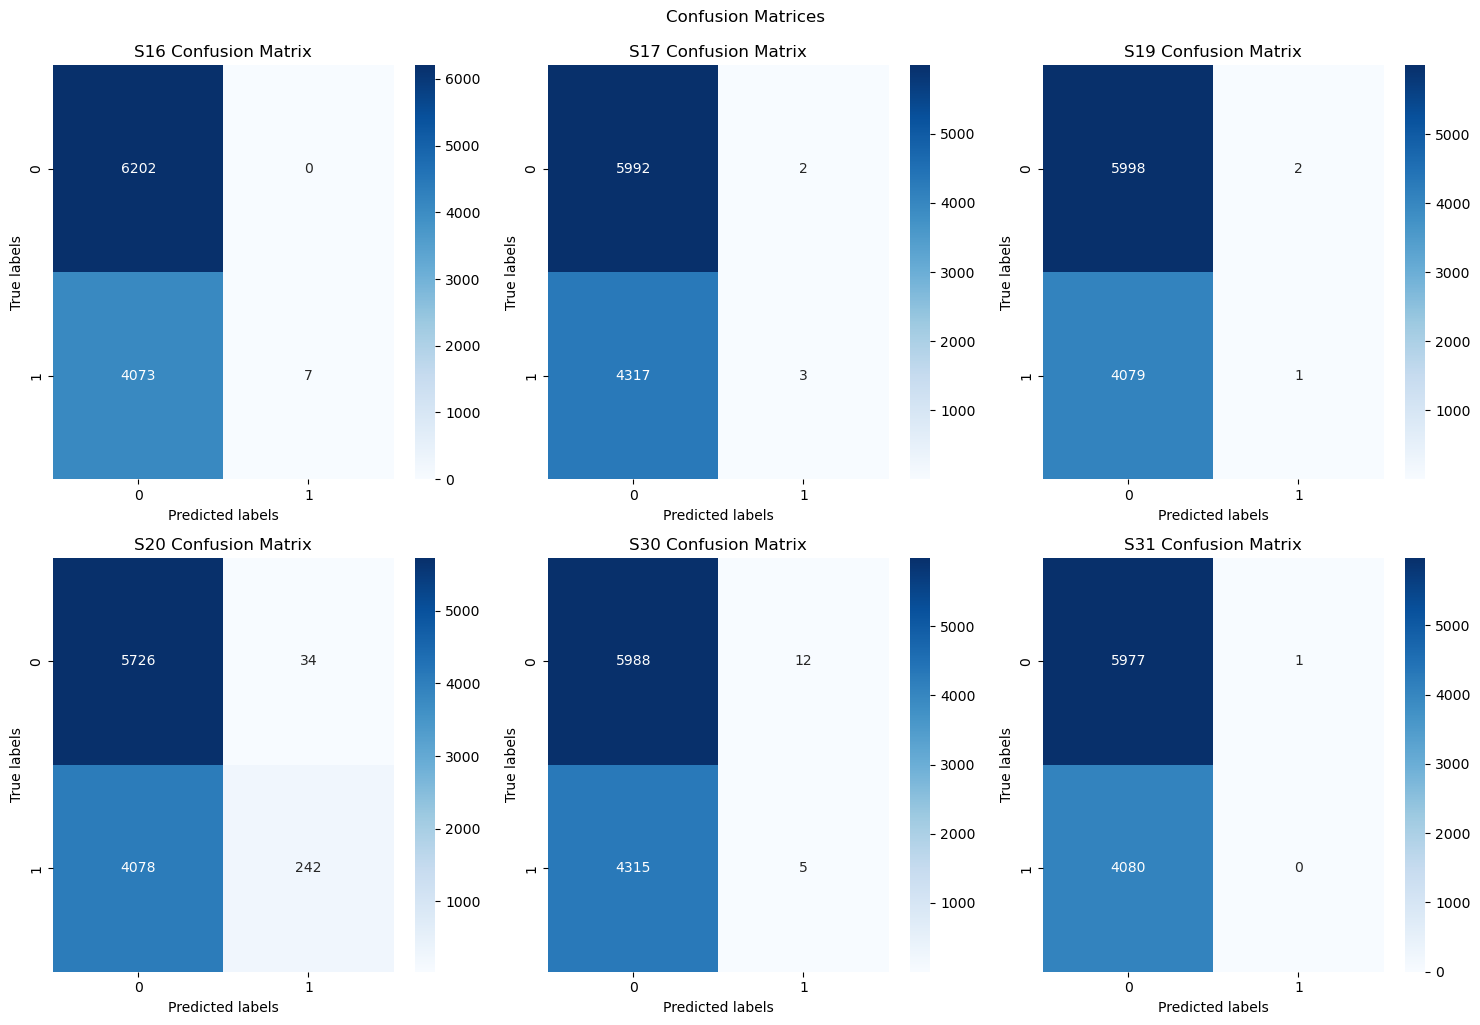

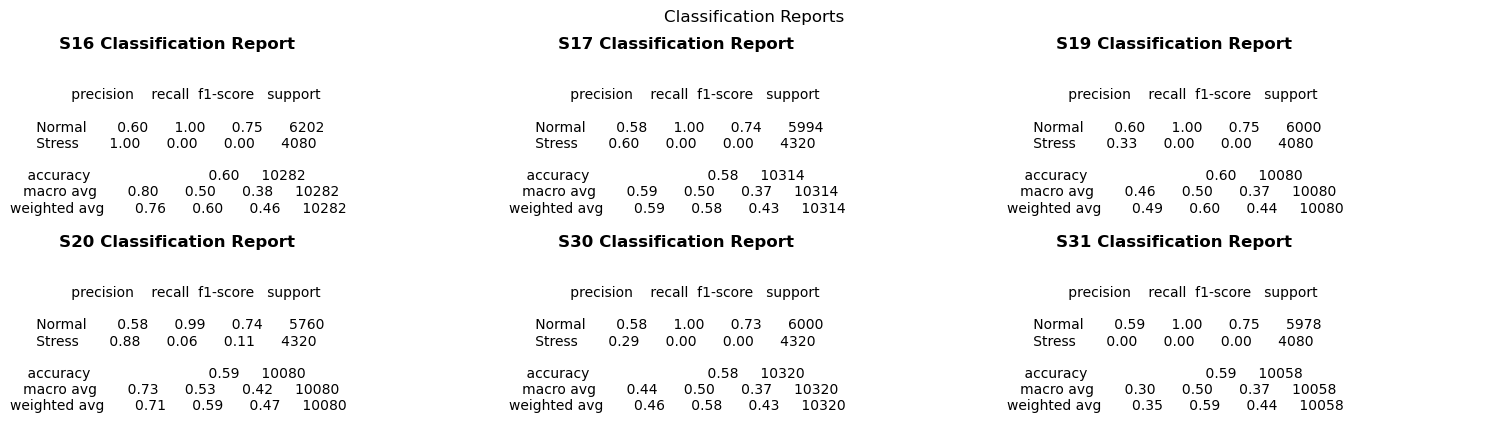


CV of S16 = 0.69
S16 Accuracy = 0.6
The FN of S16 = 4073

CV of S17 = 0.71
S17 Accuracy = 0.58
The FN of S17 = 4317

CV of S19 = 0.77
S19 Accuracy = 0.6
The FN of S19 = 4079

CV of S20 = 0.71
S20 Accuracy = 0.59
The FN of S20 = 4078

CV of S30 = 0.65
S30 Accuracy = 0.58
The FN of S30 = 4315

CV of S31 = 0.77
S31 Accuracy = 0.59
The FN of S31 = 4080

Decision Tree Analysis
--------------------
Cross-validation score on training data 0.56

Accuracy of the model on participant S16 data: 0.47
Cross-validation score on Participant S16 data: 0.7

Accuracy of the model on participant S17 data: 0.61
Cross-validation score on Participant S17 data: 0.71

Accuracy of the model on participant S19 data: 0.44
Cross-validation score on Participant S19 data: 0.57

Accuracy of the model on participant S20 data: 0.52
Cross-validation score on Participant S20 data: 0.69

Accuracy of the model on participant S30 data: 0.57
Cross-validation score on Participant S30 data: 0.57

Accuracy of the model on par

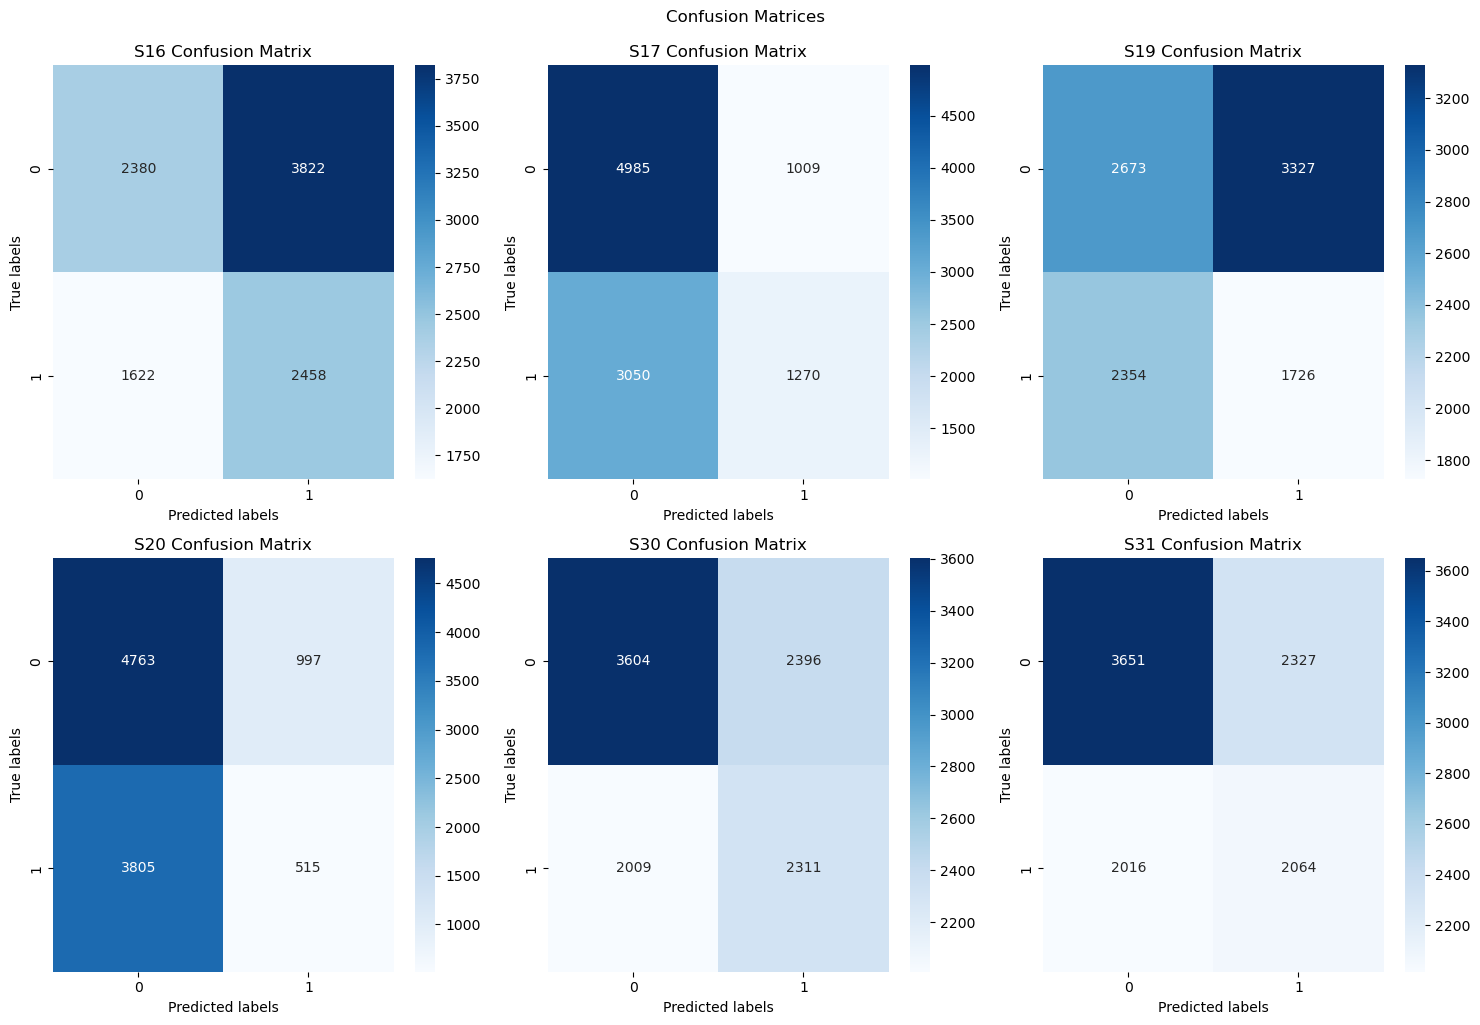

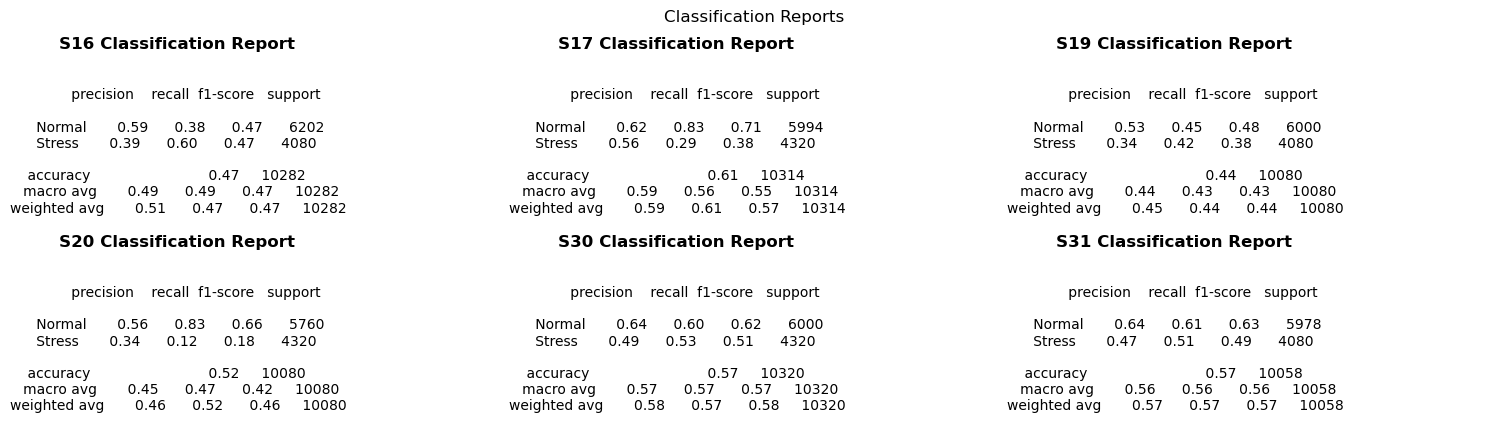


CV of S16 = 0.7
S16 Accuracy = 0.47
The FN of S16 = 1622

CV of S17 = 0.71
S17 Accuracy = 0.61
The FN of S17 = 3050

CV of S19 = 0.57
S19 Accuracy = 0.44
The FN of S19 = 2354

CV of S20 = 0.69
S20 Accuracy = 0.52
The FN of S20 = 3805

CV of S30 = 0.57
S30 Accuracy = 0.57
The FN of S30 = 2009

CV of S31 = 0.8
S31 Accuracy = 0.57
The FN of S31 = 2016

Random Forest Analysis
--------------------
Cross-validation score on training data 0.61

Accuracy of the model on participant S16 data: 0.61
Cross-validation score on Participant S16 data: 0.66

Accuracy of the model on participant S17 data: 0.58
Cross-validation score on Participant S17 data: 0.67

Accuracy of the model on participant S19 data: 0.69
Cross-validation score on Participant S19 data: 0.59

Accuracy of the model on participant S20 data: 0.63
Cross-validation score on Participant S20 data: 0.7

Accuracy of the model on participant S30 data: 0.7
Cross-validation score on Participant S30 data: 0.6

Accuracy of the model on parti

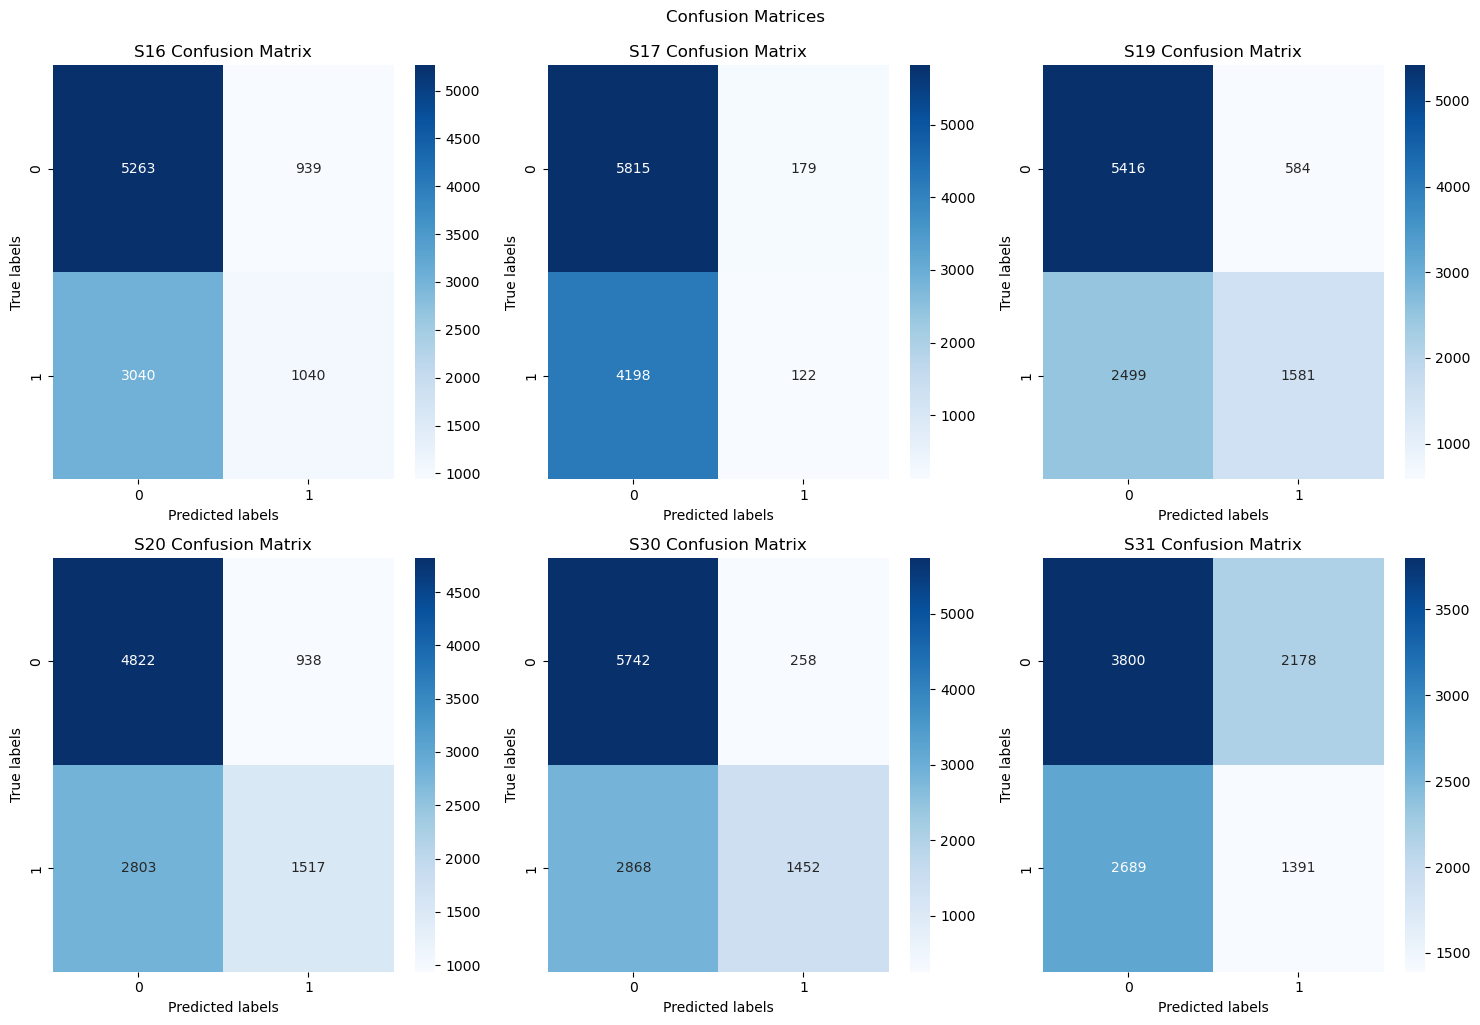

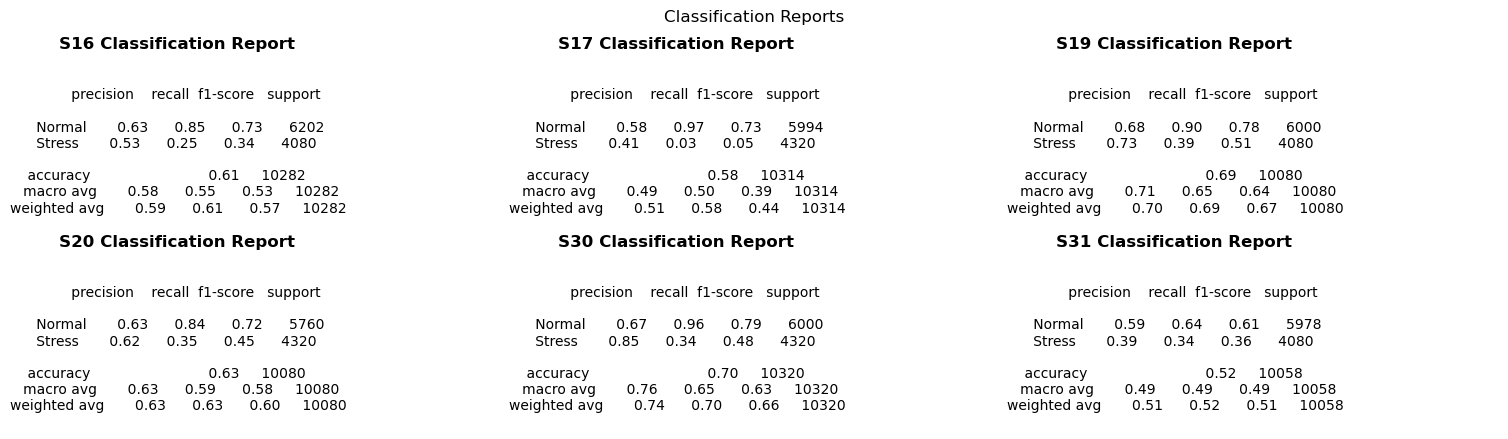


CV of S16 = 0.66
S16 Accuracy = 0.61
The FN of S16 = 3040

CV of S17 = 0.67
S17 Accuracy = 0.58
The FN of S17 = 4198

CV of S19 = 0.59
S19 Accuracy = 0.69
The FN of S19 = 2499

CV of S20 = 0.7
S20 Accuracy = 0.63
The FN of S20 = 2803

CV of S30 = 0.6
S30 Accuracy = 0.7
The FN of S30 = 2868

CV of S31 = 0.82
S31 Accuracy = 0.52
The FN of S31 = 2689


In [24]:
# Define your models and their names
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
}

# Store the results of model_analysis for each model
results = {}

show_loading_animation()
for model_name, model in models.items():
    print(f"\n{model_name} Analysis\n{'-' * 20}")
    results[model_name] = model_analysis(model, x_train, y_train, test_list)


In [29]:
def plot_metric_values(test_labels, results):
    """Plot accuracy, cross-validation, and FN for multiple models side-by-side."""
    
    # Set up the seaborn style
    sns.set_style("whitegrid")

    metrics = [
        ("Accuracy Scores for Test Datasets", "blue"),
        ("Cross-Validation Scores for Test Datasets", "green"),
        ("False Negatives for Test Datasets", "red")
        # Add more metrics here if needed
    ]
    
    num_metrics = len(metrics)
    num_rows = (num_metrics + 1) // 2 if num_metrics >= 5 else (num_metrics // 2) + (num_metrics % 2)

    plt.figure(figsize=(18, 6 * num_rows))
    
    for index, (title, color) in enumerate(metrics):
        row = index // 2 + 1
        col = index % 2 + 1
        plt.subplot(num_rows, 2, (row-1)*2 + col)

        for model_name, (accuracies, CV_scores, FN_values) in results.items():
            if title.startswith("Accuracy"):
                sns.lineplot(x=test_labels, y=accuracies, marker="o", label=model_name)
            elif title.startswith("Cross-Validation"):
                sns.lineplot(x=test_labels, y=CV_scores, marker="o", label=model_name)
            else:
                sns.lineplot(x=test_labels, y=FN_values, marker="o", label=model_name)

        plt.title(title)
        plt.xlabel("Test Dataset")
        plt.ylabel(title.split(" ")[0])  # Extract the first word of the title for the y-axis
        plt.legend()

    plt.tight_layout()
    plt.show()


In [30]:
test_labels = [f"S{test_num}" for test_num in test_list]

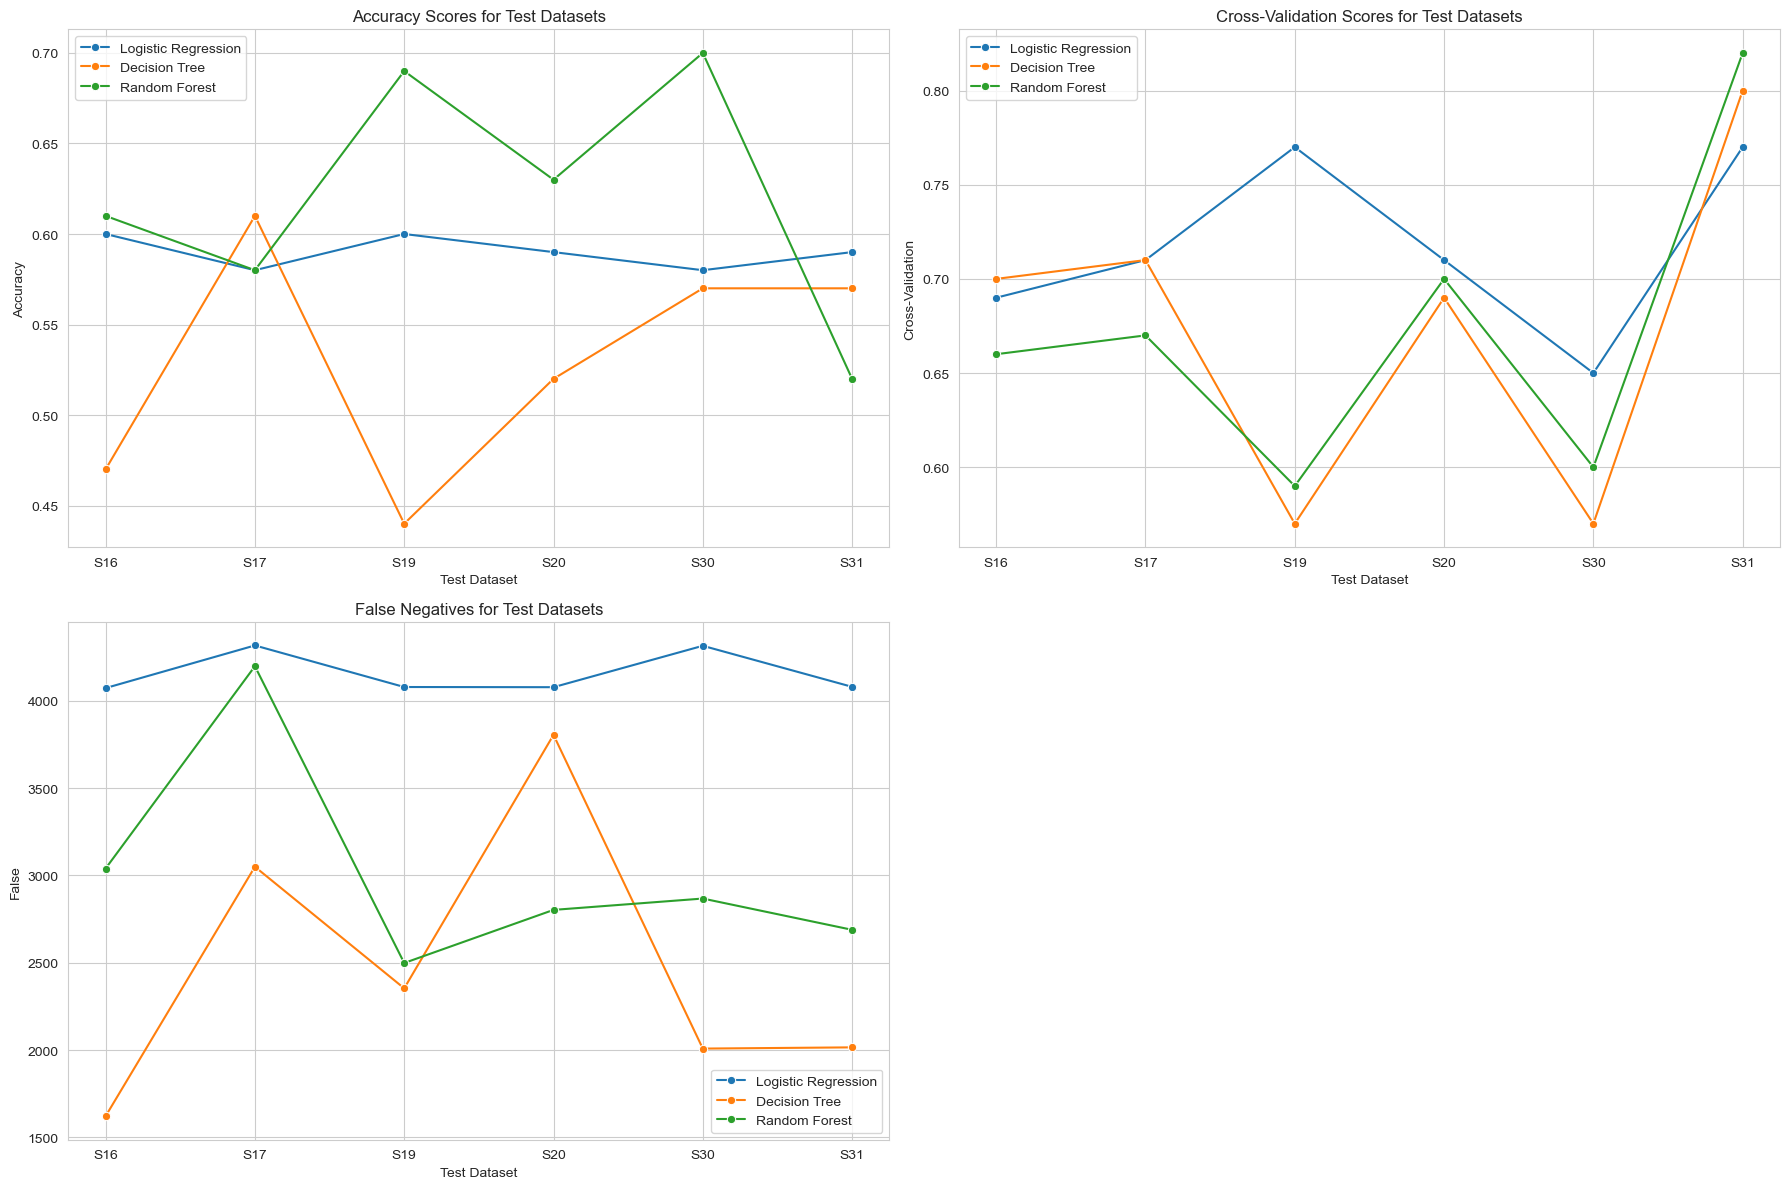

In [31]:
plot_metric_values(test_labels, results)

In [32]:
def plot_metric_values(test_labels, results):
    """Plot accuracy, cross-validation, and FN for multiple models side-by-side using bar plots."""
    
    # Set up the seaborn style
    sns.set_style("whitegrid")

    metrics = [
        ("Accuracy Scores for Test Datasets", "blue"),
        ("Cross-Validation Scores for Test Datasets", "green"),
        ("False Negatives for Test Datasets", "red")
        # Add more metrics here if needed
    ]
    
    num_metrics = len(metrics)
    num_rows = (num_metrics + 1) // 2 if num_metrics >= 5 else (num_metrics // 2) + (num_metrics % 2)

    plt.figure(figsize=(18, 6 * num_rows))
    
    for index, (title, _) in enumerate(metrics):  # color from metrics list is no longer used
        row = index // 2 + 1
        col = index % 2 + 1
        plt.subplot(num_rows, 2, (row-1)*2 + col)
        data = []

        for model_name, (accuracies, CV_scores, FN_values) in results.items():
            if title.startswith("Accuracy"):
                data.append(accuracies)
            elif title.startswith("Cross-Validation"):
                data.append(CV_scores)
            else:
                data.append(FN_values)

        # Transpose the data for proper plotting
        data = list(map(list, zip(*data)))

        df = pd.DataFrame(data, columns=list(results.keys()), index=test_labels)

        # Melt the data for seaborn bar plotting
        melted_data = df.melt(value_name='value', var_name='model', ignore_index=False).reset_index().rename(columns={'index': 'Test Dataset'})
        sns.barplot(data=melted_data, x='Test Dataset', y='value', hue='model', palette='tab10')  # Reversed Blues for better distinction

        plt.title(title)
        plt.ylabel(title.split(" ")[0])  # Extract the first word of the title for the y-axis
        plt.legend()

    plt.tight_layout()
    plt.show()


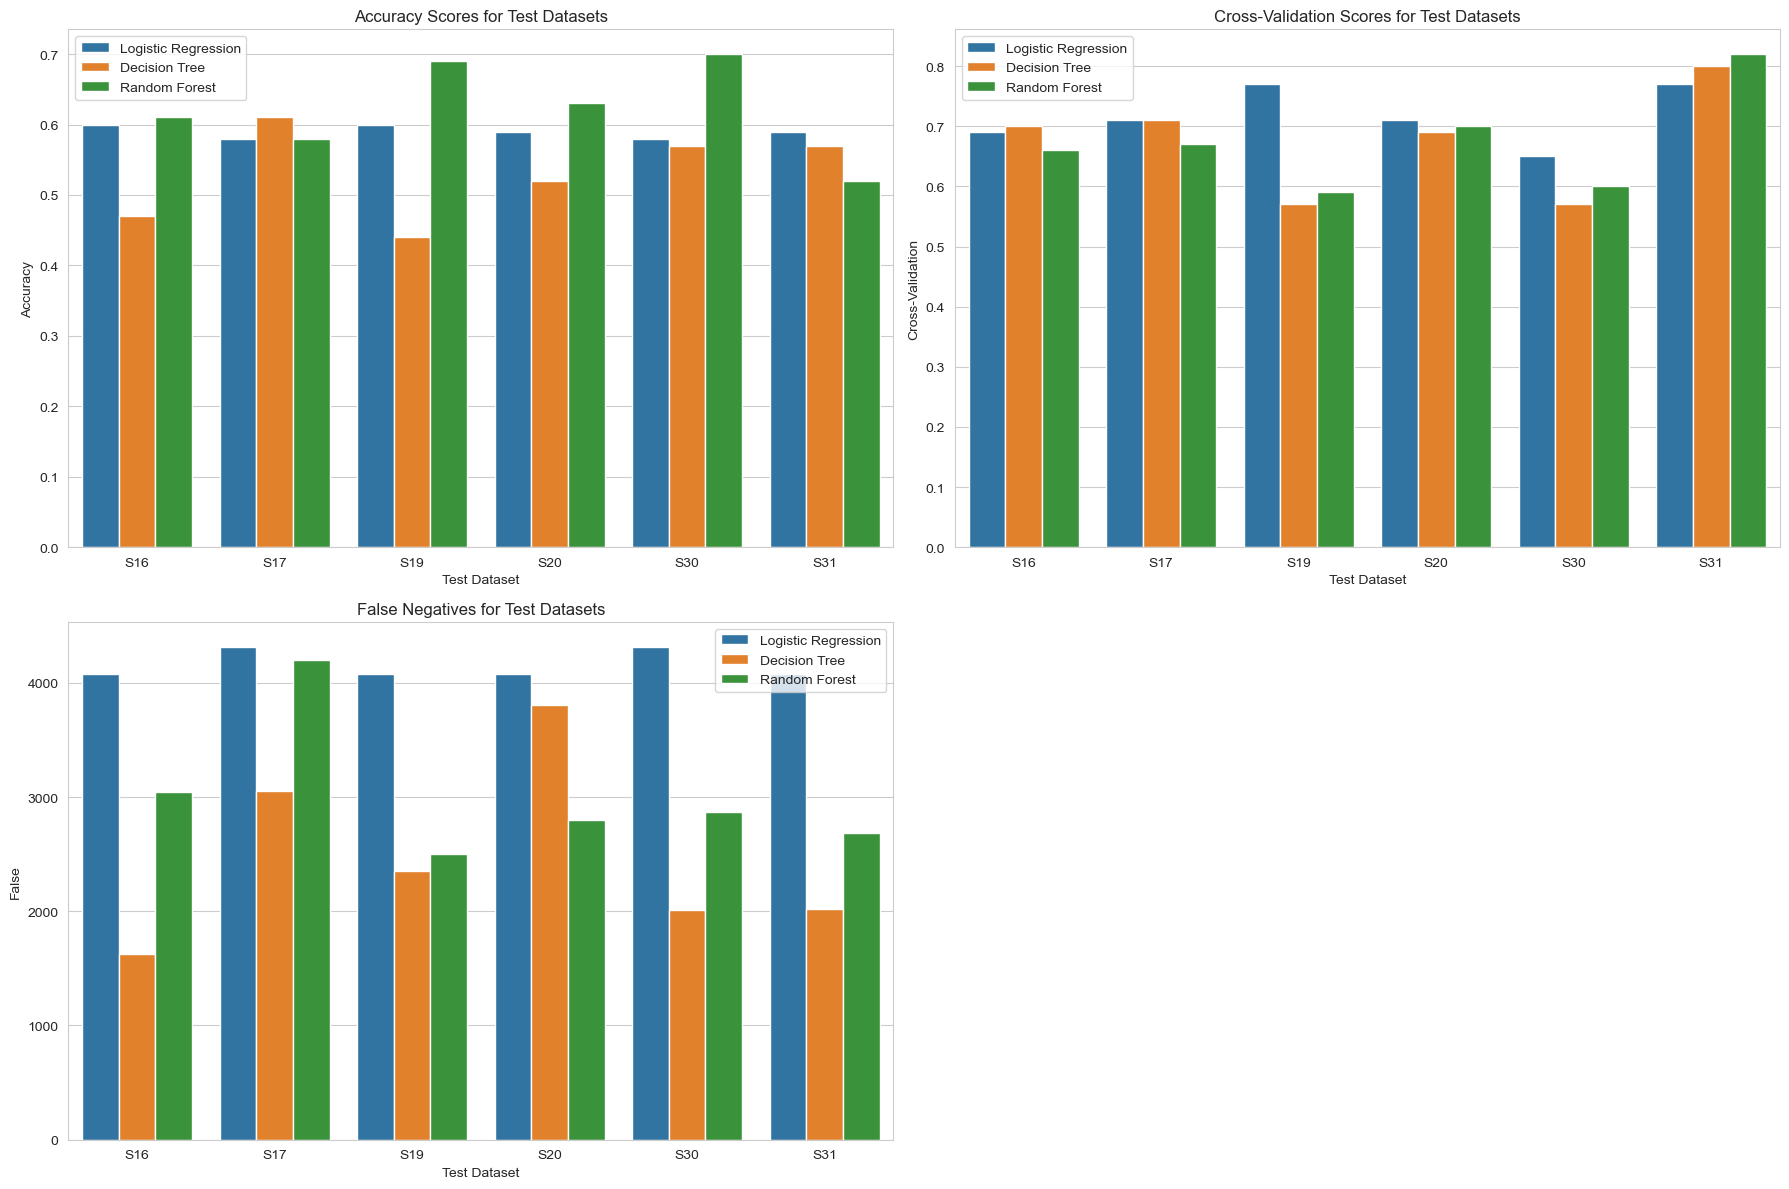

In [131]:
plot_metric_values(test_labels, results)

In [33]:
def calculate_mean(values):
    """Return the mean of a list of values."""
    return sum(values) / len(values)

# Dictionary to store the mean values for each model and metric
mean_values = {}

for model_name, (accuracies, CV_scores, FN_values) in results.items():
    accuracies_mean = round(calculate_mean(accuracies),2)
    CV_scores_mean = round(calculate_mean(CV_scores),2)
    FN_values_mean = round(calculate_mean(FN_values))

    print(f"{model_name}:\n"
          f"Mean of Accuracies: {accuracies_mean:.2f}\n"
          f"Mean of CV_scores: {CV_scores_mean:.2f}\n"
          f"Mean of FN_values: {FN_values_mean:.2f}\n")

    # Store the mean values in the dictionary
    mean_values[model_name] = (accuracies_mean, CV_scores_mean, FN_values_mean)

# Now, mean_values contains the mean of each metric for each model

Logistic Regression:
Mean of Accuracies: 0.59
Mean of CV_scores: 0.72
Mean of FN_values: 4157.00

Decision Tree:
Mean of Accuracies: 0.53
Mean of CV_scores: 0.67
Mean of FN_values: 2476.00

Random Forest:
Mean of Accuracies: 0.62
Mean of CV_scores: 0.67
Mean of FN_values: 3016.00



In [34]:
mean_values

{'Logistic Regression': (0.59, 0.72, 4157),
 'Decision Tree': (0.53, 0.67, 2476),
 'Random Forest': (0.62, 0.67, 3016)}

In [35]:
def plot_mean_values(mean_values):
    """Plot mean values of accuracy, cross-validation, and FN for multiple models."""

    sns.set_style("whitegrid")
    metrics = [
        "Mean Accuracy Scores",
        "Mean Cross-Validation Scores",
        "Mean False Negatives"
        # Add more metrics titles here if needed in the future
    ]

    num_metrics = len(metrics)
    num_rows = (num_metrics // 3) + (num_metrics % 3)  # Calculate the number of rows based on number of metrics

    plt.figure(figsize=(18, 6 * num_rows))
    
    for index, title in enumerate(metrics):
        plt.subplot(num_rows, 3, index+1)
        
        # Extracting values for the given metric
        values = [mean_values[model][index] for model in mean_values.keys()]
        
        sns.barplot(x=list(mean_values.keys()), y=values, palette="deep")
        plt.title(title)
        plt.ylabel(title.split(" ")[1])  # Extract the second word of the title for the y-axis
        plt.xticks(rotation=45)  # Rotate model names for better visibility

    plt.tight_layout()
    plt.show()

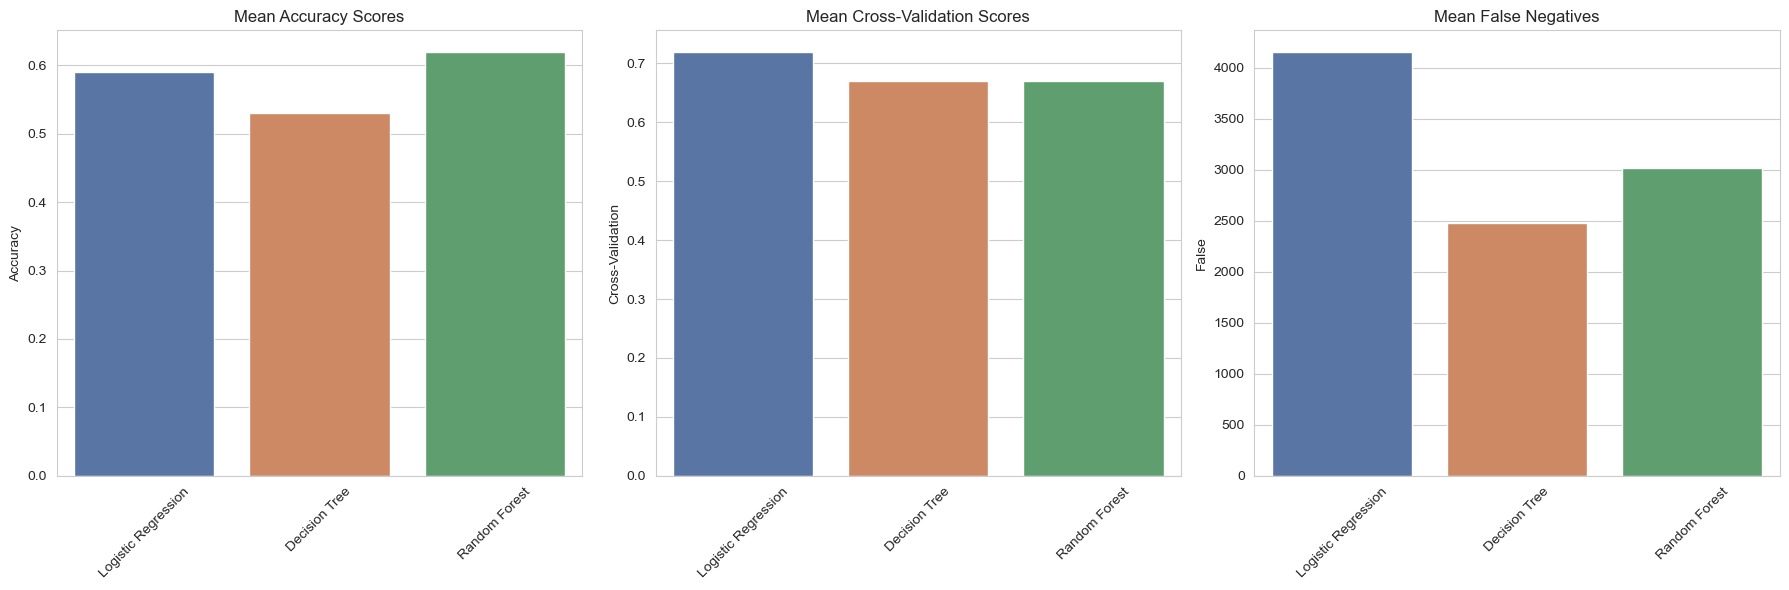

In [36]:
# Now you can call the function with your mean_values dictionary
plot_mean_values(mean_values)